In [13]:
import pandas as pd
df = pd.read_csv("./preprocessed_dataset.csv")

In [14]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rtatman/urdu-stopwords-list")

print("Path to dataset files:", path)

2688.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/abdullahasif/.cache/kagglehub/datasets/rtatman/urdu-stopwords-list/versions/1


In [15]:
import re
from collections import Counter

stop_words=pd.read_json("/Users/abdullahasif/Documents/University/Sem_5/ml/GroupNo_Project/stopwords-ur.json.txt")
stop_words=stop_words[0].to_list()


In [16]:
import torch
# # Define a list of Urdu stop words (you can expand this list)
# # stop_words = {"ہے", "ہیں", "کو", "کے", "کا", "میں", "اور", "سے", "یہ", "وہ", "پر", "تو", "ایک"}

# # Initialize a Counter to store the bag of words
bag_of_words = Counter()

# Regex pattern to remove punctuations, numbers, and English words
pattern = re.compile(r"[^\u0600-\u06FF\s]")  # Only keep Urdu characters and spaces
for i, content in enumerate(df["content"]):
    if i != 124:  # Skip the row with index 124
        # Remove punctuations, numbers, and English words
        cleaned_content = pattern.sub("", content)
        
        # Tokenize and filter out stop words
        tokens = [word for word in cleaned_content.split() if word not in stop_words]
        
        # Update the Counter with filtered tokens
        bag_of_words.update(tokens)

# Convert the Counter to a dictionary (optional, if needed)
bag_of_words_list = list(bag_of_words)
bag_of_words_dict = {word:i for i,word in enumerate(bag_of_words_list)}
gold_labels=[]
labels_dict = list(set(df["gold_label"]))
labels_dict = {word:i for i, word in enumerate(labels_dict)}
for i,label in enumerate(df["gold_label"]):
    if i ==124:
        continue
    vector = [0]*len(labels_dict)
    vector[labels_dict[label]] = 1
    gold_labels.append(vector)
gold_labels=torch.tensor(gold_labels)


import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

dataset = pd.read_csv('preprocessed_dataset.csv')
dataset = dataset.dropna(subset=['content'])
dataset['content'] = dataset['content'].astype(str)

X = dataset['content']

y = dataset['gold_label']

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)
X_bow=X_bow.toarray()
X_bow =torch.Tensor(X_bow)
# Display the bag of words


In [17]:
import torch

# class BagOfWords:
#     def __init__(self):
#         self.words = bag_of_words_dict
    
#     def vectorize(self, sentence):
#         vector = [0] * len(self.words)
#         cleaned_content = pattern.sub("", content)
        
#         # Tokenize and filter out stop words
#         words = [word for word in cleaned_content.split() if word not in stop_words]
#         for word in words:
#             if word in self.words:
#                 vector[self.words[word]] += 1
#         return torch.tensor(vector)
    
#     def transform(self, sentences):
#         return torch.stack([self.vectorize(sentence) for i,sentence in enumerate(sentences) if i !=124])
# bow = BagOfWords()
# input = bow.transform(df["content"])
# len(bag_of_words_dict)

In [18]:
from sklearn.model_selection import KFold

In [36]:
from torch.utils.data import TensorDataset,random_split,DataLoader
# gold_labels = torch.argmax(gold_labels, dim=1)
unique, counts = torch.unique(torch.argmax(gold_labels, dim=1), return_counts=True)
dataset =TensorDataset(X_bow.float(),gold_labels.float())
tr = int(len(dataset)*0.7)
te = int(len(dataset)*0.15)
va = len(dataset)-tr-te
print(tr,te,va)
train, test, val= random_split(dataset,[tr,te,va])
train_loader = DataLoader(dataset=train,shuffle=True,batch_size=32)
test_loader = DataLoader(dataset=test,shuffle=True,batch_size=32)
val_loader = DataLoader(dataset=val,shuffle=True,batch_size=32)

897 192 193


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class LinearNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearNN, self).__init__()
        self.fc = nn.Sequential(
            # nn.Linear(input_size,128*5),
            # nn.LeakyReLU(),
            # # nn.Dropout(),
            # nn.Linear(128*5,64),
            # nn.LeakyReLU(),
            # # nn.Dropout(),
            # nn.Linear(64,output_size),
            # nn.Sigmoid()
        nn.Linear(input_size, 256),
        nn.LeakyReLU(),
        nn.Linear(256, output_size)
        )

        
    
    def forward(self, x):
        # x = torch.flatten(x,start_dim=1)
        return self.fc(x)

# Parameters


# Example of dummy input and target
# input_tensor = torch.randn(861, input_size)  # Dummy input
# target_tensor = torch.randint(0, output_size, (861,))  # Dummy target (class indices)
# print(input_tensor.shape)
# print(target_tensor.shape)
# Training loop (single epoch example)


In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score

def fit_one_epoch(model, data_loader, optimizer, loss_fn):
    '''
    Perform one epoch of training
    '''
    model.train()
    total_loss = 0.0
    for (inputs, labels) in data_loader:
        outputs = model(inputs)  
        loss = loss_fn(outputs, labels.float()) 
        # print(outputs[:3])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(data_loader)
    return avg_loss


@torch.no_grad()
def evaluate(model, data_loader, loss_fn):
    '''
    Perform one epoch of evaluation
    '''
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    pred = []
    true = []
    for inputs, labels in data_loader:
        outputs = model(inputs)  # Logits output
        # probabilities = torch.softmax(outputs,dim=1)  # Apply softmax to logits
        loss = loss_fn(outputs, labels.float())
        total_loss += loss.item()

        # print("Class distribution:", labels.sum(dim=0))

        # predicted = torch.argmax(probabilities, dim=1)
        # labels_max = torch.argmax(labels, dim=1)
        predicted = torch.argmax(outputs, dim=1)  # Predicted classes
        labels_max = torch.argmax(labels, dim=1)  # True labels
        # print(predicted[0], labels_max[0]) 
        pred.extend(predicted)
        true.extend(labels_max)
        # correct += (predicted == labels_max).sum().item()
        # total += labels.size(0)

    avg_loss = total_loss / len(data_loader)
    # accuracy = correct / total
    return avg_loss, accuracy_score(pred,true)


def fit(model, train_loader, val_loader, optimizer, loss_fn, epochs):
    '''
    Perform the entire training process
    '''
    history = [list(), list(), list(), list()] 

    for epoch in range(epochs):
        train_loss, train_accuracy = evaluate(model, train_loader, loss_fn)
        train_loss = fit_one_epoch(model, train_loader, optimizer, loss_fn)
        val_loss, val_accuracy = evaluate(model, val_loader, loss_fn)

        history[0].append(train_loss)
        history[1].append(train_accuracy)
        history[2].append(val_loss)
        history[3].append(val_accuracy)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    return history


In [39]:
from torch.utils.data import TensorDataset,random_split,DataLoader
# gold_labels = torch.argmax(gold_labels, dim=1)
unique, counts = torch.unique(torch.argmax(gold_labels, dim=1), return_counts=True)
dataset =TensorDataset(X_bow.float(),gold_labels.float())
tr = int(len(dataset)*0.7)
te = int(len(dataset)*0.15)
va = len(dataset)-tr-te

train, test, val= random_split(dataset,[tr,te,va])
train_loader = DataLoader(dataset=train,shuffle=True,batch_size=64)
test_loader = DataLoader(dataset=test,shuffle=True,batch_size=64)
val_loader = DataLoader(dataset=val,shuffle=True,batch_size=64)

In [ ]:
history = []
# model = LinearNN(input_size,output_size)
input_size = 15800
output_size = 5
model = LinearNN(input_size, output_size)
print(model)
loss_fn = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0)
history = fit(model,train_loader,val_loader,optimizer,loss_fn,20)

LinearNN(
  (fc): Sequential(
    (0): Linear(in_features=15800, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=5, bias=True)
  )
)
Epoch 1/20, Train Loss: 1.3960, Train Accuracy: 0.2921, Val Loss: 0.9065, Val Accuracy: 0.8394
Epoch 2/20, Train Loss: 0.9604, Train Accuracy: 0.9264, Val Loss: 0.7585, Val Accuracy: 0.8808
Epoch 3/20, Train Loss: 0.6964, Train Accuracy: 0.9632, Val Loss: 0.8023, Val Accuracy: 0.9067
Epoch 4/20, Train Loss: 0.5244, Train Accuracy: 0.9688, Val Loss: 0.6502, Val Accuracy: 0.9171
Epoch 5/20, Train Loss: 0.4871, Train Accuracy: 0.9755, Val Loss: 0.8038, Val Accuracy: 0.9275
Epoch 6/20, Train Loss: 0.3403, Train Accuracy: 0.9788, Val Loss: 0.3702, Val Accuracy: 0.9326
Epoch 7/20, Train Loss: 0.2965, Train Accuracy: 0.9810, Val Loss: 0.4465, Val Accuracy: 0.9326
Epoch 8/20, Train Loss: 0.2375, Train Accuracy: 0.9822, Val Loss: 0.3180, Val Accuracy: 0.9275
Epoch 9/20, Train Loss: 0.2024, Train Ac

In [41]:
torch.no_grad()
model.eval()
# outputs = []
# for inputs, labels in test_loader:        
#         outputs.append( model(inputs))  # Logits output
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred, y_true = [], []
for inputs, labels in test_loader:
    outputs = model(inputs)
    predicted = torch.argmax(outputs, dim=1)
    labels_max = torch.argmax(labels, dim=1)
    y_pred.extend(predicted.tolist())
    y_true.extend(labels_max.tolist())
print(accuracy_score(y_pred,y_true))
print(confusion_matrix(y_pred,y_true))
print(classification_report(y_pred,y_true))

0.9270833333333334
[[36  1  3  0  1]
 [ 0 31  1  0  1]
 [ 1  0 41  0  1]
 [ 2  0  0 46  2]
 [ 0  0  1  0 24]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.97      0.94      0.95        33
           2       0.89      0.95      0.92        43
           3       1.00      0.92      0.96        50
           4       0.83      0.96      0.89        25

    accuracy                           0.93       192
   macro avg       0.92      0.93      0.92       192
weighted avg       0.93      0.93      0.93       192



In [ ]:
evaluate(model,test_loader,loss_fn)

(0.2795369178056717, 0.9270833333333334)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

class LinearNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, dropout_rate=0.0):
        super(LinearNN, self).__init__()
        layers = []
        in_features = input_size
        for hidden_units in hidden_layers:
            layers.append(nn.Linear(in_features, hidden_units))
            layers.append(nn.LeakyReLU())
            if dropout_rate > 0:
                layers.append(nn.Dropout(dropout_rate))
            in_features = hidden_units
        layers.append(nn.Linear(in_features, output_size))
        self.fc = nn.Sequential(*layers)

    def forward(self, x):
        return self.fc(x)

# Training and evaluation functions
def fit_one_epoch(model, data_loader, optimizer, loss_fn):
    model.train()
    total_loss = 0.0
    for inputs, labels in data_loader:
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

@torch.no_grad()
def evaluate(model, data_loader, loss_fn):
    model.eval()
    total_loss = 0.0
    y_pred, y_true = [], []
    for inputs, labels in data_loader:
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        total_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        labels_max = torch.argmax(labels, dim=1)
        y_pred.extend(predicted.tolist())
        y_true.extend(labels_max.tolist())
    accuracy = accuracy_score(y_true, y_pred)
    return total_loss / len(data_loader), accuracy

def run_experiment(hyperparams, input_size, output_size, dataset, runs=3):
    results = []
    for i,config in enumerate(hyperparams):
        lr, batch_size, epochs, weight_decay, hidden_layers, dropout_rate = config
        train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
        for _ in range(runs):  # Multiple runs for randomness
            tr, te, va = int(len(dataset) * 0.7), int(len(dataset) * 0.15), len(dataset) - int(len(dataset) * 0.7) - int(len(dataset) * 0.15)
            train, test, val = random_split(dataset, [tr, te, va])
            train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(val, batch_size=batch_size, shuffle=False)

            model = LinearNN(input_size, output_size, hidden_layers, dropout_rate)
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
            loss_fn = nn.CrossEntropyLoss()

            for epoch in range(epochs):
                fit_one_epoch(model, train_loader, optimizer, loss_fn)
            val_loss, val_acc = evaluate(model, val_loader, loss_fn)

            val_losses.append(val_loss)
            val_accuracies.append(val_acc)
        
        avg_val_loss = sum(val_losses) / runs
        avg_val_acc = sum(val_accuracies) / runs
        results.append((config, avg_val_loss, avg_val_acc))
        print(f"{i+1}'th iteration done out of {len(hyperparams)}")
    return results

learning_rates = [0.01,0.001, 0.0001]
batch_sizes = [32, 64,128]
epochs = [20,40,100]
weight_decays = [0.0, 1e-4]
hidden_layers_configs = [[256], [256, 128], [512, 256, 128]]
dropout_rates = [0.0, 0.2, 0.3]

hyperparams = list(itertools.product(learning_rates, batch_sizes, epochs, weight_decays, hidden_layers_configs, dropout_rates))
print(len(hyperparams))
input_size = 15800
output_size = 5
dataset = TensorDataset(X_bow.float(), gold_labels.float())
results = run_experiment(hyperparams, input_size, output_size, dataset)
for config, val_loss, val_acc in results:
    print(f"Config: {config}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")
learning_rate_results = {lr: [] for lr in learning_rates}
for config, _, val_acc in results:
    learning_rate_results[config[0]].append(val_acc)

plt.figure(figsize=(10, 6))
for lr, accs in learning_rate_results.items():
    plt.plot(accs, label=f"Learning Rate: {lr}")
plt.title("Validation Accuracy for Different Learning Rates")
plt.xlabel("Experiment")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


486


KeyboardInterrupt: 

In [ ]:
results_df1= pd.DataFrame(results, columns=['Config', 'Val Loss', 'Val Accuracy'])
results_df1['Config'] = results_df1['Config'].astype(str)
results_df1.to_csv('results2.csv', index=False)

-0.9585492227979274


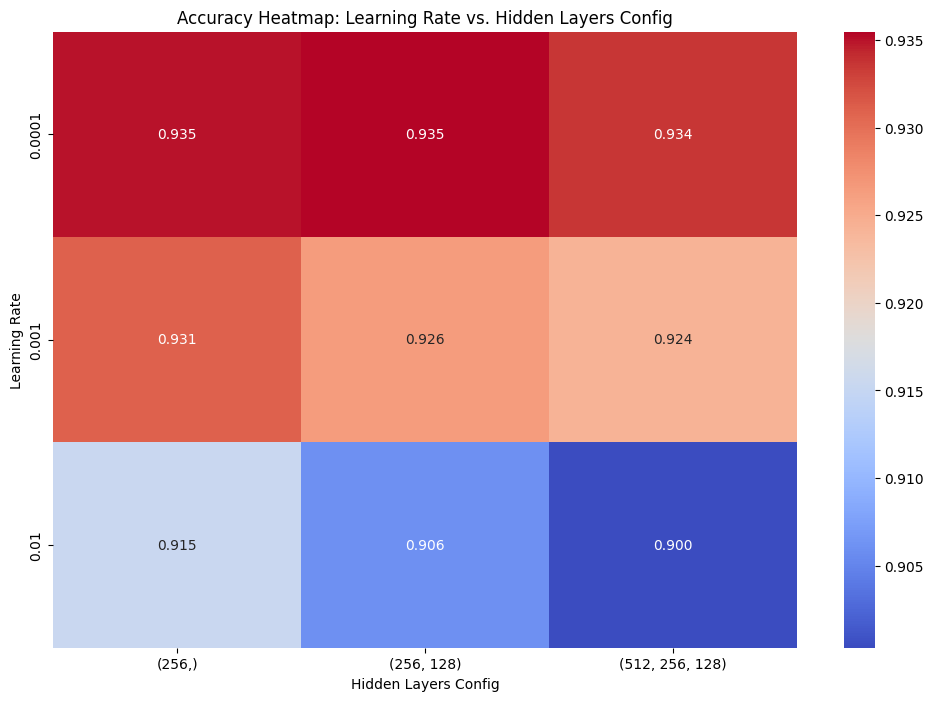

In [ ]:
import seaborn as sns
configs = results_df1["Config"].apply(eval)  
losses = results_df1["Val Loss"]
accuracies = results_df1["Val Accuracy"]
i=accuracies.argmax()
print(configs[i],accuracies[i])

columns = ["learning_rate", "batch_size", "epochs", "weight_decay", "hidden_layers_config", "dropout_rate"]
configs_df = pd.DataFrame(configs.tolist(), columns=columns)
configs_df["hidden_layers_config"] = configs_df["hidden_layers_config"].apply(tuple)
results_df = pd.concat([configs_df, losses, accuracies], axis=1)
results_df.columns = columns + ["loss", "accuracy"]
heatmap_data = results_df.groupby(["learning_rate", "hidden_layers_config"])["accuracy"].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Accuracy Heatmap: Learning Rate vs. Hidden Layers Config")
plt.xlabel("Hidden Layers Config")
plt.ylabel("Learning Rate")
plt.show()

In [ ]:
tr, te, va = int(len(dataset) * 0.7), int(len(dataset) * 0.15), len(dataset) - int(len(dataset) * 0.7) - int(len(dataset) * 0.15)
train, test, val = random_split(dataset, [tr, te, va])
train_loader = DataLoader(train, batch_size=128, shuffle=True)
val_loader = DataLoader(val, batch_size=128, shuffle=False)
test_loader = DataLoader(test, batch_size=128, shuffle=False)

model = LinearNN(input_size, output_size, [256], 0.0)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.0)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(20):
    fit_one_epoch(model, train_loader, optimizer, loss_fn)
val_loss, val_acc = evaluate(model, val_loader, loss_fn)
print(evaluate(model,test_loader,loss_fn))

NameError: name 'dataset' is not defined

15
Config: Hidden Layers=[128], Activation=ReLU, LR=0.0001, Avg Accuracy=0.9326
Config: Hidden Layers=[128], Activation=LeakyReLU, LR=0.0001, Avg Accuracy=0.9332
Config: Hidden Layers=[128], Activation=Tanh, LR=0.0001, Avg Accuracy=0.9337


/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **

Config: Hidden Layers=[128], Activation=Softmax, LR=0.0001, Avg Accuracy=0.9150
Config: Hidden Layers=[128], Activation=Sigmoid, LR=0.0001, Avg Accuracy=0.9326
Config: Hidden Layers=[256, 128], Activation=ReLU, LR=0.0001, Avg Accuracy=0.9316
Config: Hidden Layers=[256, 128], Activation=LeakyReLU, LR=0.0001, Avg Accuracy=0.9347
Config: Hidden Layers=[256, 128], Activation=Tanh, LR=0.0001, Avg Accuracy=0.9337


/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **

Config: Hidden Layers=[256, 128], Activation=Softmax, LR=0.0001, Avg Accuracy=0.3953
Config: Hidden Layers=[256, 128], Activation=Sigmoid, LR=0.0001, Avg Accuracy=0.9389
Config: Hidden Layers=[512, 256, 128], Activation=ReLU, LR=0.0001, Avg Accuracy=0.9321
Config: Hidden Layers=[512, 256, 128], Activation=LeakyReLU, LR=0.0001, Avg Accuracy=0.9332
Config: Hidden Layers=[512, 256, 128], Activation=Tanh, LR=0.0001, Avg Accuracy=0.9321


/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/opt/anaconda3/envs/AI_env/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **

Config: Hidden Layers=[512, 256, 128], Activation=Softmax, LR=0.0001, Avg Accuracy=0.2114
Config: Hidden Layers=[512, 256, 128], Activation=Sigmoid, LR=0.0001, Avg Accuracy=0.9332


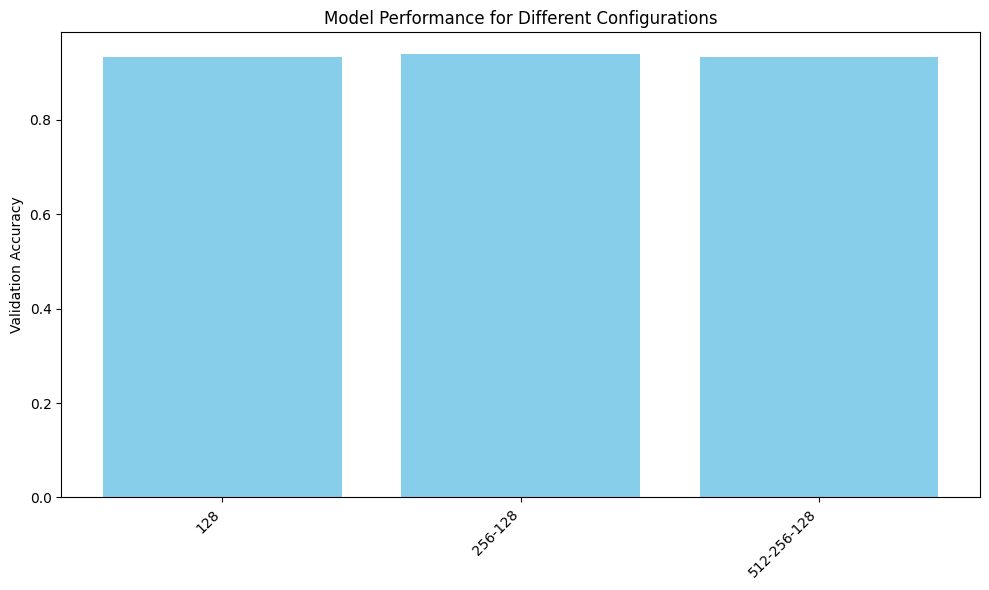

In [ ]:
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
class ConfigurableNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, activation_fn):
        super(ConfigurableNN, self).__init__()
        layers = []
        in_features = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(in_features, hidden_size))
            layers.append(activation_fn())
            in_features = hidden_size
        layers.append(nn.Linear(in_features, output_size))
        self.fc = nn.Sequential(*layers)

    def forward(self, x):
        return self.fc(x)

# Training and evaluation functions
def fit_one_epoch(model, data_loader, optimizer, loss_fn):
    model.train()
    total_loss = 0
    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

@torch.no_grad()
def evaluate(model, data_loader, loss_fn):
    model.eval()
    total_loss = 0
    y_pred, y_true = [], []
    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, labels.float())
        total_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        labels_max = torch.argmax(labels, dim=1)
        y_pred.extend(predicted.tolist())
        y_true.extend(labels_max.tolist())
    accuracy = accuracy_score(y_true, y_pred)
    return total_loss / len(data_loader), accuracy

def train_and_evaluate_model(input_size, output_size, hidden_layers, activation_fn, train_loader, val_loader, epochs, lr):
    model = ConfigurableNN(input_size, output_size, hidden_layers, activation_fn).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    best_val_accuracy = 0
    for _ in range(epochs):
        fit_one_epoch(model, train_loader, optimizer, loss_fn)
        _, val_accuracy = evaluate(model, val_loader, loss_fn)
        best_val_accuracy = max(best_val_accuracy, val_accuracy)
    return best_val_accuracy

input_size = 15800
output_size = 5
hidden_layer_options = [[128], [256, 128], [512, 256, 128]]
activation_options = [nn.ReLU, nn.LeakyReLU, nn.Tanh, nn.Softmax,nn.Sigmoid]
learning_rates = [0.0001]
epochs = 100
repeats_per_config = 10

X_bow, gold_labels = X_bow.to(device), gold_labels.to(device)

dataset = TensorDataset(X_bow.float(), gold_labels.float())
tr, te, va = int(len(dataset) * 0.7), int(len(dataset) * 0.15), len(dataset) - int(len(dataset) * 0.7) - int(len(dataset) * 0.15)
train, test, val = random_split(dataset, [tr, te, va])
train_loader = DataLoader(train, shuffle=True, batch_size=64)
val_loader = DataLoader(val, shuffle=True, batch_size=64)

results = []
configs = list(itertools.product(hidden_layer_options, activation_options, learning_rates))
print(len(configs))
for hidden_layers, activation_fn, lr in configs:
    val_accuracies = []
    for _ in range(repeats_per_config):
        val_accuracy = train_and_evaluate_model(input_size, output_size, hidden_layers, activation_fn, train_loader, val_loader, epochs, lr)
        val_accuracies.append(val_accuracy)
    avg_accuracy = np.mean(val_accuracies)
    results.append((hidden_layers, activation_fn.__name__, lr, avg_accuracy))
    print(f"Config: Hidden Layers={hidden_layers}, Activation={activation_fn.__name__}, LR={lr}, Avg Accuracy={avg_accuracy:.4f}")
hidden_layer_labels = ['-'.join(map(str, layers)) for layers, _, _, _ in results]
accuracies = [accuracy for _, _, _, accuracy in results]

plt.figure(figsize=(10, 6))
plt.bar(hidden_layer_labels, accuracies, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Validation Accuracy')
plt.title('Model Performance for Different Configurations')
plt.tight_layout()
plt.show()


In [ ]:

results_df1= pd.DataFrame(results, columns=['Config', 'Activation', 'Lr','val_accuracies'])
results_df1['Config'] = results_df1['Config'].astype(str)
results_df1.to_csv('results_neural.csv', index=False)

NameError: name 'results' is not defined

(0.0001, 128, 100, 0.0, [256], 0.0) 0.9602763385146804


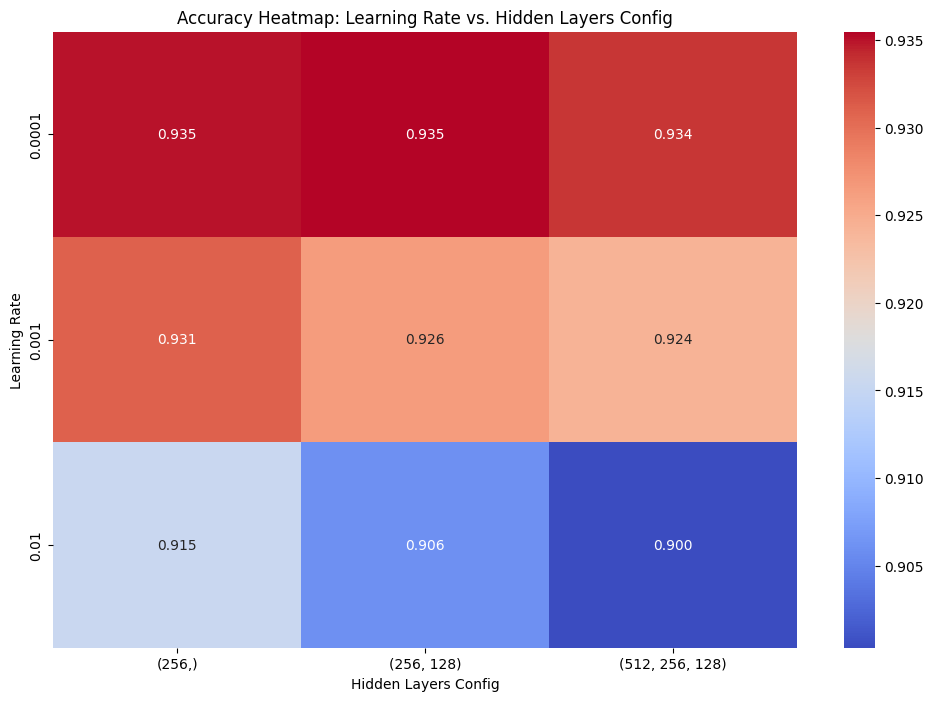

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("./results2.csv")
configs = df["Config"].apply(eval) 
losses = df["Val Loss"]
accuracies = df["Val Accuracy"]
i=accuracies.argmax()
print(configs[i],accuracies[i])
columns = ["learning_rate", "batch_size", "epochs", "weight_decay", "hidden_layers_config", "dropout_rate"]
configs_df = pd.DataFrame(configs.tolist(), columns=columns)
configs_df["hidden_layers_config"] = configs_df["hidden_layers_config"].apply(tuple)
results_df = pd.concat([configs_df, losses, accuracies], axis=1)
results_df.columns = columns + ["loss", "accuracy"]
heatmap_data = results_df.groupby(["learning_rate", "hidden_layers_config"])["accuracy"].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Accuracy Heatmap: Learning Rate vs. Hidden Layers Config")
plt.xlabel("Hidden Layers Config")
plt.ylabel("Learning Rate")
plt.show()

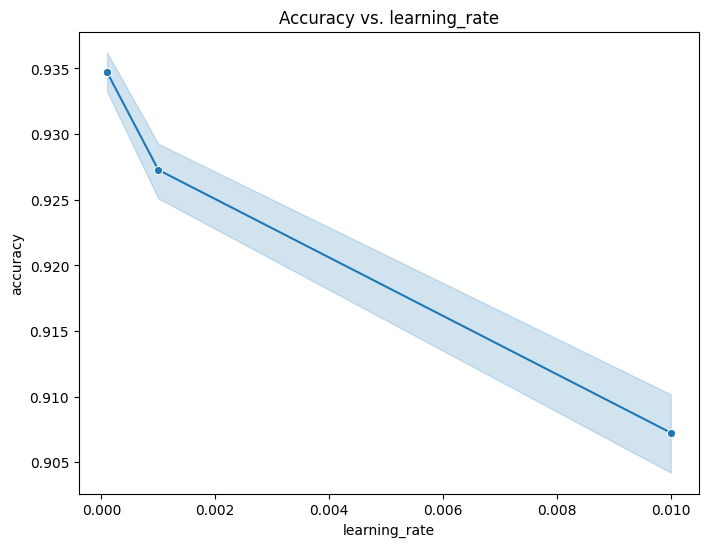

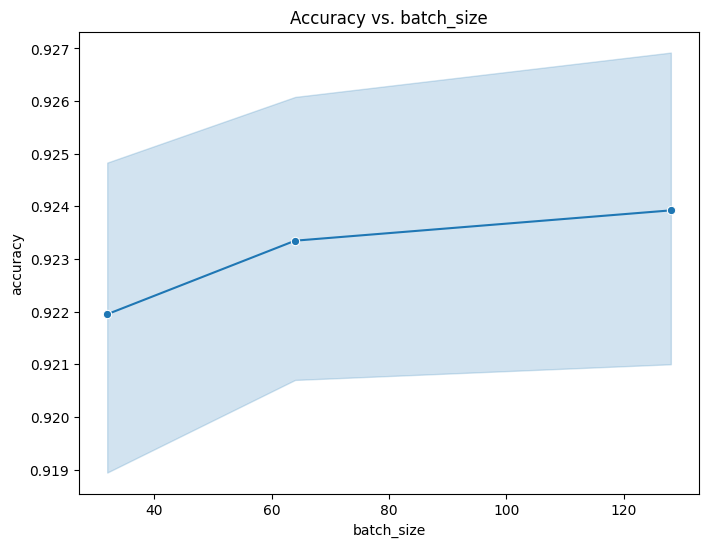

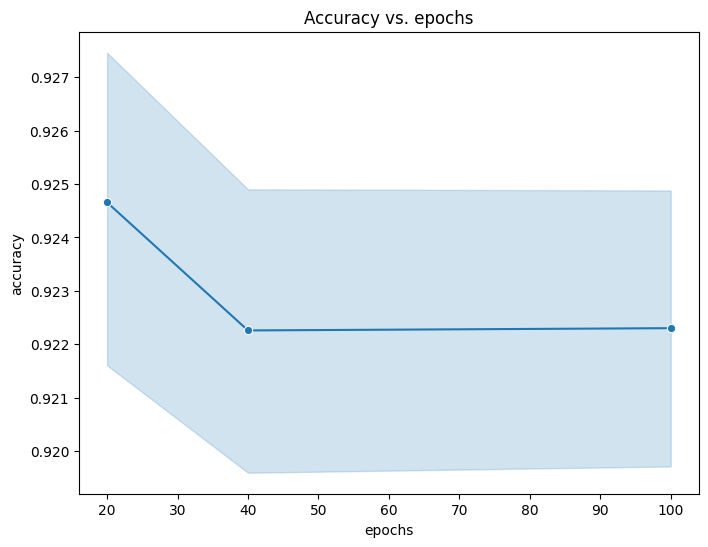

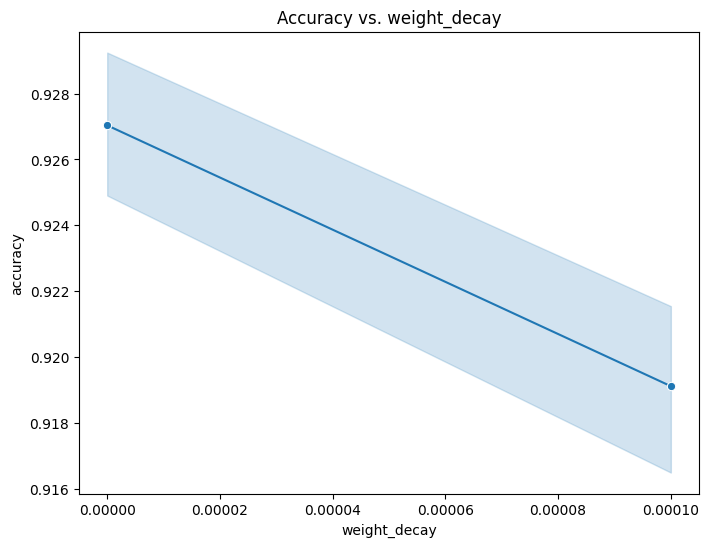

TypeError: Invalid object type at position 0

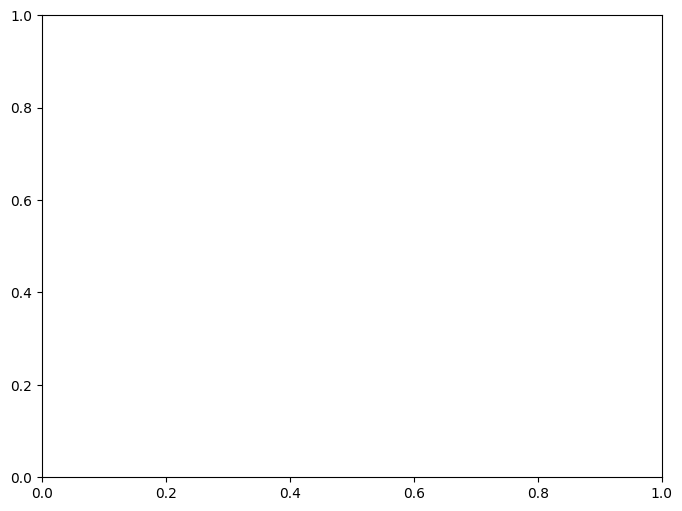

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['learning_rate', 'batch_size', 'epochs', 'weight_decay', 
            'hidden_layers_config', 'dropout_rate']:
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=results_df, x=col, y='accuracy', marker='o')
    plt.title(f'Accuracy vs. {col}')
    plt.show()


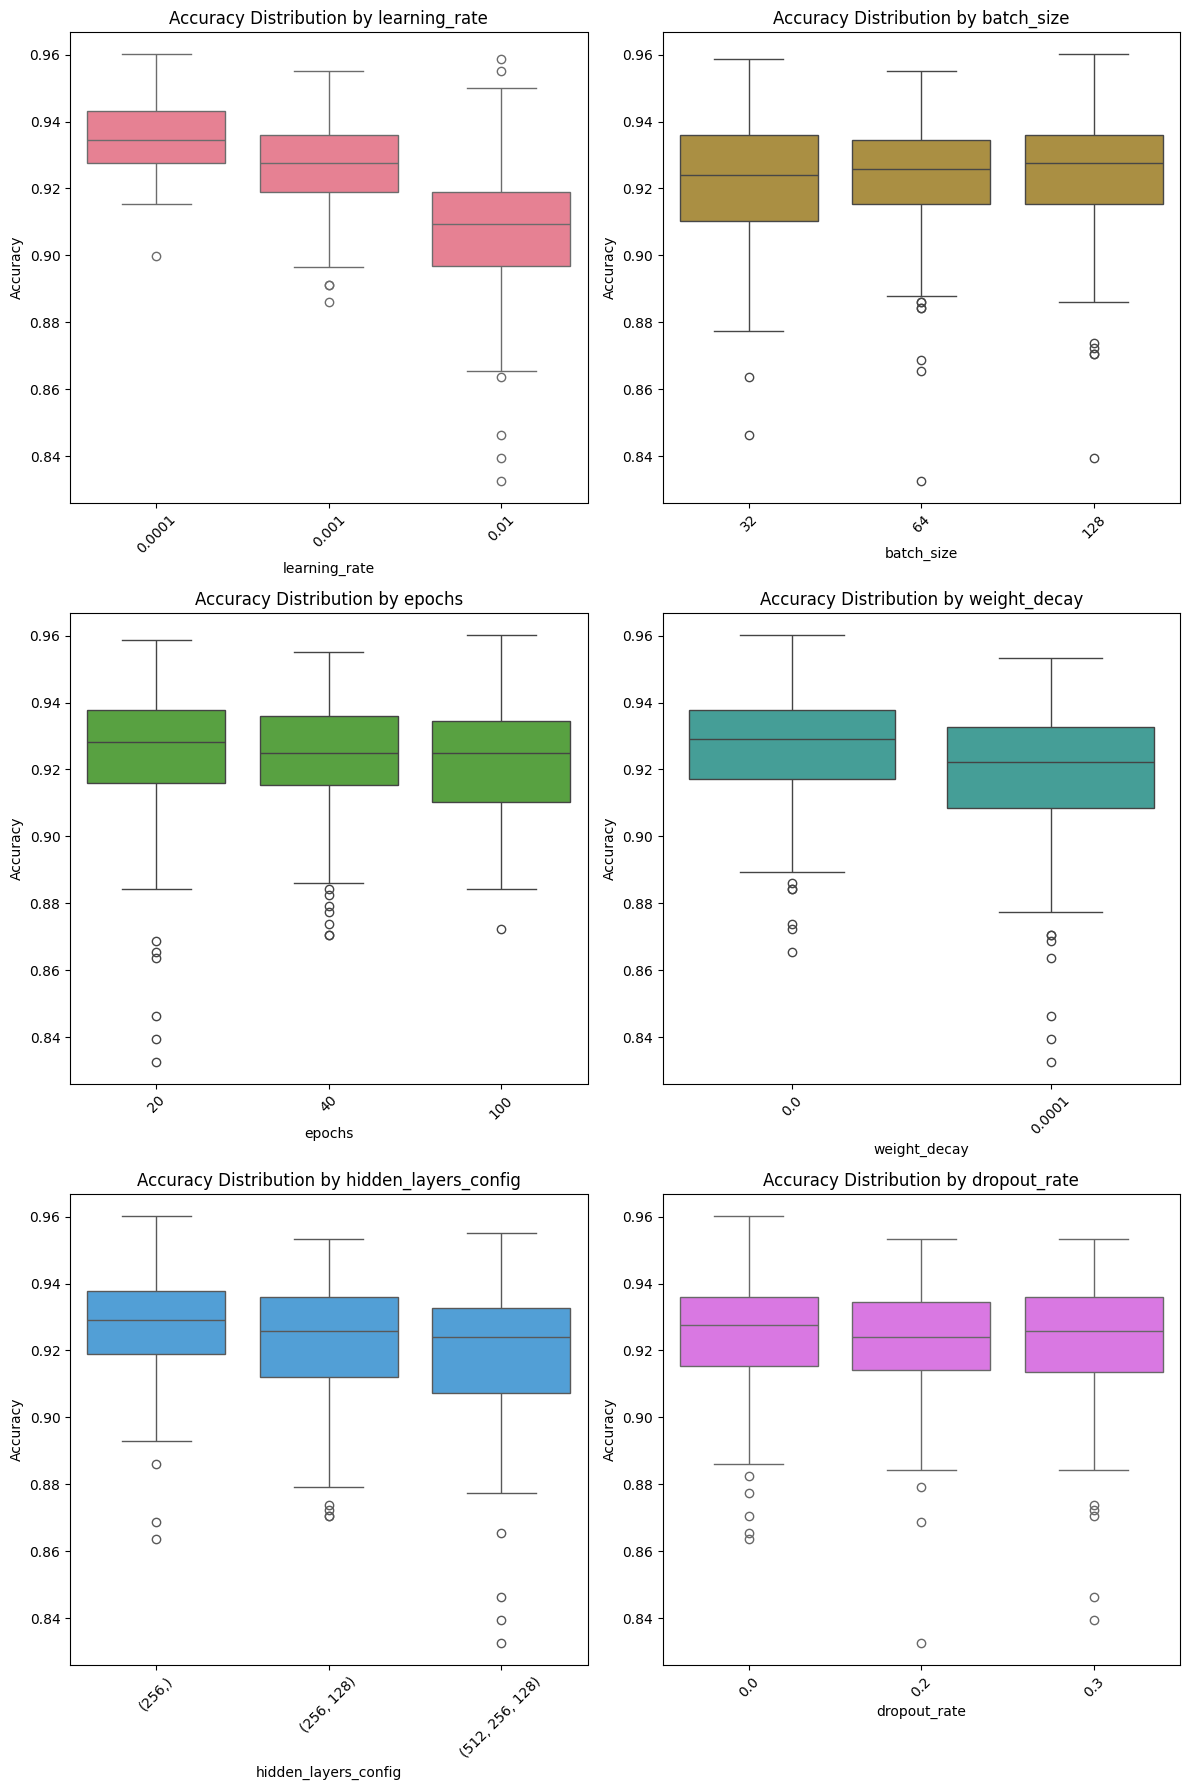

In [ ]:
hyperparams = ['learning_rate', 'batch_size', 'epochs', 
               'weight_decay', 'hidden_layers_config', 'dropout_rate']
results_df['hidden_layers_config'] = results_df['hidden_layers_config'].astype(str)
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.flatten()
colors = sns.color_palette("husl", len(hyperparams))
# Generate boxplots
for ax, param,col in zip(axes, hyperparams,colors):
    sns.boxplot(data=results_df, x=param, y='accuracy', ax=ax,color=col)
    ax.set_title(f'Accuracy Distribution by {param}')
    ax.set_xlabel(param)
    ax.set_ylabel('Accuracy')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


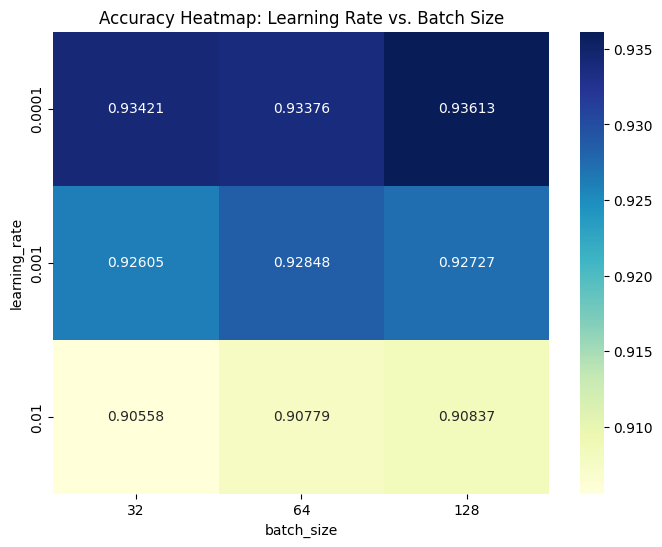

In [ ]:
import numpy as np

pivot_table = results_df.pivot_table(values='accuracy', 
                             index='learning_rate', 
                             columns='batch_size')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".5f")
plt.title('Accuracy Heatmap: Learning Rate vs. Batch Size')
plt.show()
